# Simple Linear Regression

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from random import gauss
from lin_reg import best_line
from scipy import stats
import seaborn as sns
from sklearn.linear_model import LinearRegression
from mpl_toolkits import mplot3d
import sklearn.metrics as metrics
import statsmodels.api as sm

%matplotlib inline

## Agenda

- Explain and use the concepts of covariance and correlation
- Explain how to interpret linear regressions
- Describe the assumptions of linear regression

## Covariance and Correlation

The idea of _correlation_ is the simple idea that variables often change _together_. For a simple example, cities with more buses tend to have higher populations.

We might observe that, as one variable X increases, so does another Y, OR that as X increases, Y decreases.

The _covariance_ describes how two variables co-vary. Note the similarity in the definition to the definition of ordinary variance:

### Covariance

For two random variables $X$ and $Y$, each with $n$ values:

$\Large\sigma_{XY} = \frac{\Sigma^n_{i = 1}(x_i - \mu_x)(y_i - \mu_y)}{n}$ <br/>

In [ ]:
X = [1, 3, 5]
Y = [2, 9, 10]

In [ ]:
# Covariance by hand:
((1-3) * (2-7) + (3-3) * (9-7) + (5-3) * (10-7)) / 3

# Better yet: With NumPy:
np.cov(X, Y, ddof=0)[0, 1]

np.cov(X, Y, ddof=0)

Note that the value of the covariance is very much a function of the values of X and Y, which can make interpretation difficult. What is wanted is a _standardized_ scale for covariance, hence: _correlation_.

### Correlation

Pearson Correlation:<br/>$\Large r_P = \frac{\Sigma^n_{i = 1}(x_i - \mu_x)(y_i - \mu_y)}{\sqrt{\Sigma^n_{i = 1}(x_i - \mu_x)^2\Sigma^n_{i = 1}(y_i -\mu_y)^2}}$

Note that we are simply standardizing the covariance by the standard deviations of X and Y (the $n$'s cancel!).

$\bf{Check}$:

<details><summary>
What happens if X = Y?
</summary>
Then numerator = denominator and the correlation = 1!
</details>
<br/>
We'll always have $-1 \leq r \leq 1$. (This was the point of standardizing by the standard deviations of X and Y.)

A correlation of -1 means that X and Y are perfectly negatively correlated, and a correlation of 1 means that X and Y are perfectly positively correlated.

NumPy also has a correlation method:

In [ ]:
np.corrcoef(X, Y)

In [ ]:
4 / np.sqrt(19)

In [ ]:
np.corrcoef(X, Y)[0, 1] == (np.cov(X, Y, ddof=0) / (np.std(X) * np.std(Y)))[0, 1]

And so does SciPy:

In [ ]:
stats.pearsonr(X, Y)[0]

## Causation

_Why_ does it happen that variables correlate? It _may_ be that one is the cause of the other. A city having a high population, for example, probably does have some causal effect on the number of buses that the city has. But this _need not_ be the case, and that is why statisticians are fond of saying that 'correlation is not causation'. An alternative possibility, for example, is that high values of X and Y are _both_ caused by high values of some third factor Z. The size of children's feet, for example, is correlated with their ability to spell, but this is of course NOT because either is a cause of the other. Rather, BOTH are caused by the natural maturing and development of children. As they get older, both their feet and their spelling abilities grow!

## Statistical Learning Theory

It's important at this point to understand the distinction between dependent and independent variables.

Roughly, the independent variable is what can be directly manipulated and the dependent variable is what cannot be (but is nevertheless of great interest). What matters structurally is simply that we understand the dependent variable to be a _function_ of the independent variable(s).

This is the proper interpretation of a statistical _model_.

Simple idea: We can model correlation with a _line_. As one variable changes, so does the other.

This model has two *parameters*: *slope* and *y-intercept*.

Unless there's a perfectly (and suspiciously) linear relationship between our predictor(s) and our target, there will  be some sort of **error** or **loss** or **residual**. The best-fit line is constructed by minimizing the sum of the squares of these losses.

## Regression Equation

The solution for a simple regression best-fit line is as follows:

- slope: <br/>$\Large m = r_P\frac{\sigma_y}{\sigma_x} = \frac{cov(X, Y)}{var(X)}$

- y-intercept:<br/> $\Large b = \mu_y - m\mu_x$

### Proof

We demonstrate this by setting the derivative of the loss function, $\Sigma^n_{i=1}(y_i - (mx_i + b))^2$, equal to 0. **We shall see this calculus trick many times!**

For this purpose we consider the loss a function of its optimizing parameters $m$ and $b$. So there are therefore two partial derivatives to consider. (We'll cover this in more depth later in the course.)

(i) $\frac{\partial}{\partial b}[\sum^n_{i=1}(y_i - mx_i - b)^2] = -2\sum^n_{i=1}(y_i - mx_i - b)$

(ii) $\frac{\partial}{\partial m}[\sum^n_{i=1}(y_i - mx_i - b)^2] = -2\sum^n_{i=1}x_i\sum^n_{i=1}(y_i - mx_i - b)$

- Let's set the first to 0:

$-2\sum^n_{i=1}(y_i - mx_i - b) = 0$ <br/>
$\sum^n_{i=1}(y_i - mx_i) = \sum^n_{i=1}b = nb$ <br/>

**So:** $\large b = \frac{\sum^n_{i=1}(y_i - mx_i)}{n} = \mu_y - m\mu_x$

- Let's set the second to 0:

$-2\sum^n_{i=1}x_i\sum^n_{i=1}(y_i - mx_i - b) = 0$ <br/>
$\sum^n_{i=1}(x_iy_i - mx^2_i - bx_i) = 0$ <br/>

- Plugging in our previous result, we have:

$\sum^n_{i=1}x_iy_i - (\frac{1}{n}\sum^n_{i=1}y_i - \frac{m}{n}\sum^n_{i=1}x_i)\sum^n_{i=1}x_i - m\sum^n_{i=1}x^2_i = 0$ <br/>
$\sum^n_{i=1}x_iy_i - \frac{1}{n}\sum^n_{i=1}x_i\sum^n_{i=1}y_i + \frac{m}{n}(\sum^n_{i=1}x_i)^2 - m\sum^n_{i=1}x^2_i = 0$ <br/>

**So:** $\large m = \frac{\sum^n_{i=1}x_iy_i - \frac{1}{n}\sum^n_{i=1}x_i\sum^n_{i=1}y_i}{\sum^n_{i=1}x^2_i - \frac{1}{n}(\sum^n_{i=1}x_i)^2} = \frac{n\times(\frac{1}{n}\sum^n_{i=1}x_iy_i - \frac{1}{n^2}\sum^n_{i=1}x_i\sum^n_{i=1}y_i)}{n\times(\frac{1}{n}\sum^n_{i=1}x^2_i - \mu^2_x)} = \frac{cov(X, Y)}{var(X)}$

For more on the proof see [here](https://math.stackexchange.com/questions/716826/derivation-of-simple-linear-regression-parameters).

## Interpretation

The output of the simple linear regression algorithm is a pair of parameters: the slope and the y-intercept of the best-fit line through the data.

***I therefore have a (more or less crude) MODEL of the phenomenon in question:***

Suppose I have a bunch of data about (i) how many cigarettes people smoked in their lifetimes and (ii) how many years those same people lived. If I set my independent variable ("x") to be the number of cigarettes smoked and my dependent variable ("y") to be the number of years lived, then ***for any deceased person at all I will have a way of estimating the number of years that person lived if I know the number of cigarettes that that person smoked***. This estimate is exactly what the best-fit line gives me.

Suppose the parameters of the regression come out to be $\beta_0 = 100$ years and $\beta_1 = -1\times 10^{-4}$ years / cigarette ([in reality](https://www.medicalnewstoday.com/releases/9703#1) these are probably both a bit high).

Then we would be modeling the lifespan of human beings according to the number of cigarettes smoked:

$Y = \beta_1\times n + \beta_0$,

where $Y$ = the number of years (estimated) and $n$ is the number of cigarettes smoked.

- If someone smoked 0 cigarettes, then we would estimate that person's lifespan as:

$-1\times 10^{-4}\times 0 + 100 = 100$ years.

- If someone smoked a pack a day for 30 years, that's 20 * 365 * 30 = 219000 cigarettes (never mind about leap years!), so we would estimate that person's lifespan as:

$-1\times 10^{-4}\times 219000 + 100 = 78.1$ years.

# Simple Linear Regression with `statsmodels`

Let's take a look at how to build a simple linear regression model with `statsmodels`. The `statsmodels` package offers a highly descriptive report of the fit of a regression model. Let's generate a simple regression and then analyze the report!

First let's try data that fit a straight line perfectly:

In [2]:
x = np.arange(20)
y = 3*x + 5

test_df = pd.DataFrame({'x': x, 'y':y})
test_df.head(10)

,x,y
0,0,5
1,1,8
2,2,11
3,3,14
4,4,17
5,5,20
6,6,23
7,7,26
8,8,29
9,9,32


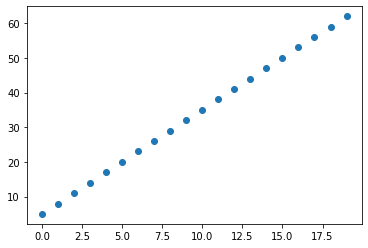

In [3]:
plt.scatter(x, y)

# Sidebar: Using `best_line()`

Let's take a look at the code.

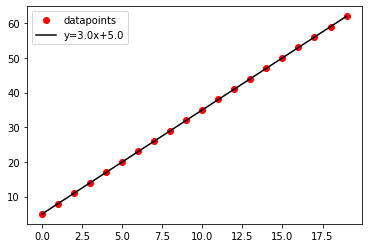

In [4]:
best_line(x, y)

The best-fit line exists no matter what my data look like!

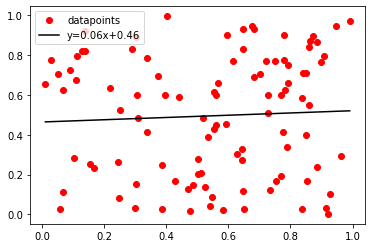

In [5]:
X_rand = stats.uniform.rvs(size=100)
Y_rand = stats.uniform.rvs(size=100)

best_line(X_rand, Y_rand)

Experiment: [Playing with regression line](https://www.desmos.com/calculator/jwquvmikhr)

## Regression Without Error in `statsmodels`

In [7]:
#Y as a function of X. Y is target = dependent variable, X is predictor or independent variable
sm.formula.ols(formula = "y ~ x", data = test_df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.321e+31
Date:                Tue, 02 Mar 2021   Prob (F-statistic):          7.48e-274
Time:                        10:21:23   Log-Likelihood:                 611.51
No. Observations:                  20   AIC:                            -1219.
Df Residuals:                      18   BIC:                            -1217.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.0000   5.79e-15   8.64e+14      0.000       5.000       5.000
x              3.0000   5.21e-16   5.76e+15      0.000       3.000       3.000
==============================================================================
Omnibus:                       43.228   Durbin-Watson:                   0.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                3.335
Skew:                           0.201   Prob(JB):                        0.189
Kurtosis:                       1.040   Cond. No.                         21.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Regression with Error in `statsmodels`

Now let's add a little noise:

In [8]:
x = np.arange(20)
y = np.array([3*pt + 5 + gauss(mu=0, sigma=5) for pt in x])

df2 = pd.DataFrame(columns=['x', 'y'])

df2['x'] = x
df2['y'] = y

df2.head(10)

,x,y
0,0,5.517950
1,1,2.660781
2,2,15.515277
3,3,13.038497
4,4,12.060007
5,5,14.301236
6,6,18.409769
7,7,33.273072
8,8,29.999722
9,9,25.121948


In [9]:
model = sm.formula.ols(formula='y~x', data=df2).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     317.4
Date:                Tue, 02 Mar 2021   Prob (F-statistic):           7.03e-13
Time:                        10:24:40   Log-Likelihood:                -57.163
No. Observations:                  20   AIC:                             118.3
Df Residuals:                      18   BIC:                             120.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.5582      1.916      1.335      0.198      -1.467       6.583
x              3.0710      0.172     17.815      0.000       2.709       3.433
==============================================================================
Omnibus:                        0.975   Durbin-Watson:                   1.645
Prob(Omnibus):                  0.614   Jarque-Bera (JB):                0.926
Skew:                           0.378   Prob(JB):                        0.629
Kurtosis:                       2.266   Cond. No.                         21.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Please note the difference between `sm.OLS()` and `sm.formula.ols()`!

### Fitted Model Attributes and Methods

The fitted model has [many](https://www.statsmodels.org/stable/generated/statsmodels.regression.linear_model.RegressionResults.html) attributes and methods. I'll look at a couple here.

In [10]:
model.tvalues

Intercept     1.335371
x            17.815027
dtype: float64

In [11]:
model.pvalues

Intercept    1.983974e-01
x            7.025941e-13
dtype: float64

In [12]:
model.mse_total

348.8180653790093

The `.summary()` method contains lots of helpful information about the model.

In [13]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     317.4
Date:                Tue, 02 Mar 2021   Prob (F-statistic):           7.03e-13
Time:                        10:31:40   Log-Likelihood:                -57.163
No. Observations:                  20   AIC:                             118.3
Df Residuals:                      18   BIC:                             120.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.5582      1.916      1.335      0.198      -1.467       6.583
x              3.0710      0.172     17.815      0.000       2.709       3.433
==============================================================================
Omnibus:                        0.975   Durbin-Watson:                   1.645
Prob(Omnibus):                  0.614   Jarque-Bera (JB):                0.926
Skew:                           0.378   Prob(JB):                        0.629
Kurtosis:                       2.266   Cond. No.                         21.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

What are all these statistics!? Let's say a word about them.

## Coefficient of Determination

Very often a data scientist will calculate $R^2$, the *coefficient of determination*, as a measure of how well the model fits the data.

$R^2$ for a model is ultimately a _relational_ notion. It's a measure of goodness of fit _relative_ to a (bad) baseline model. This bad baseline model is simply the horizontal line $y = \mu_Y$, for dependent variable $Y$.

The actual calculation of $R^2$ is: <br/> $\Large R^2\equiv 1-\frac{\Sigma_i(y_i - \hat{y}_i)^2}{\Sigma_i(y_i - \bar{y})^2}$.

$R^2$ is a measure of how much variation in the dependent variable your model explains.

## Other Regression Statistics

What else do we have in this report?

- **F-statistic**: The F-test measures the significance of your model relative to a model in which all coefficients are 0, i.e. relative to a model that says there is no correlation whatever between the predictors and the target. <br/><br/>
- **Log-Likelihood**: The probability in question is the probability of seeing these data points, *given* the model parameter values. The higher this is, the more our data conform to our model and so the better our fit. AIC and BIC are related to the log-likelihood; we'll talk about those later. <br/><br/>
- **coef**: These are the betas as calculated by the least-squares regression. We also have p-values and 95%-confidence intervals. <br/><br/>
- **Omnibus**: This is a test for error normality. The probability is the chance that the errors are normally distributed. <br/><br/>
- **Durbin-Watson**: This is a test for autocorrelation. We'll return to this topic in Phase 4. <br/><br/>
- **Jarque-Bera**: This is another test for error normality. <br/><br/>
- **Cond. No.**: The condition number tests for independence of the predictors. Lower scores are better. When the predictors are *not* independent, we can run into problems of multicollinearity. For more on the condition number, see [here](https://stats.stackexchange.com/questions/168259/how-do-you-interpret-the-condition-number-of-a-correlation-matrix).

**Many good regression diagnostics are available in** [`statsmodels`](https://www.statsmodels.org/dev/examples/notebooks/generated/regression_diagnostics.html). For more on statsmodels regression statistics, see [here](https://www.accelebrate.com/blog/interpreting-results-from-linear-regression-is-the-data-appropriate).

# Assumptions of Linear Regression

Linear regression models make the following assumptions about the data and the process that generated them.

[Here](https://www.statisticssolutions.com/assumptions-of-linear-regression/) is a helpful resource on the assumptions of linear regression.

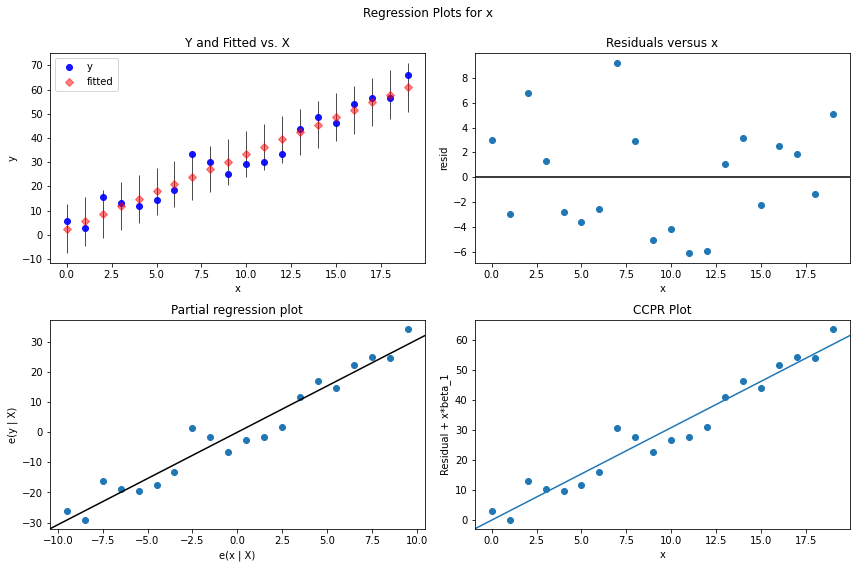

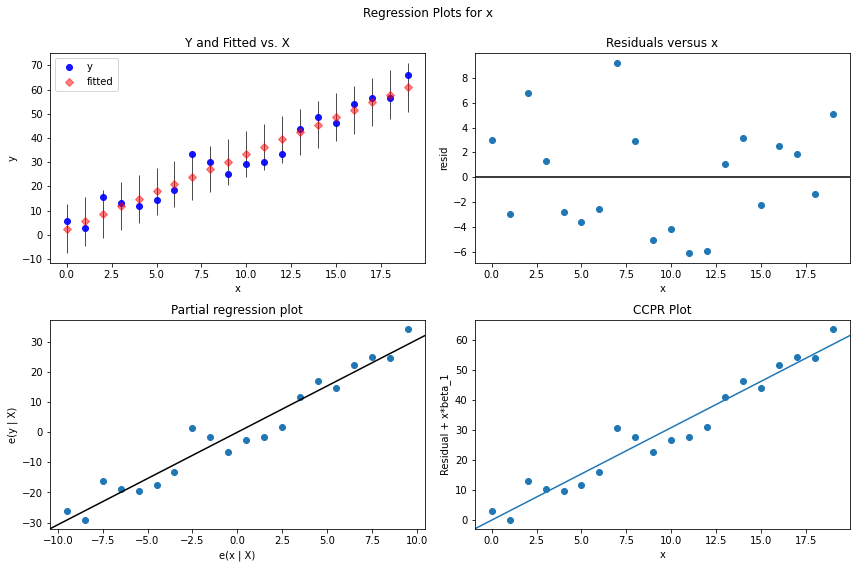

In [14]:
sm.graphics.plot_regress_exog(model, 'x', fig=plt.figure(figsize=(12, 8)))

## Linearity

**The relationship between the target and predictor is linear.** Check this by drawing a scatter plot of your predictor and your target, and see if there is evidence that the relationship might not folow a straight line.

## Independence

**The errors are independent**. In other words: Knowing the error for one point doesn't tell you anything about the error for another.

**How can I check for this?**
- Make a scatter plot of the residuals and target values and look for patterns
- Check the Durbin-Watson score

## Normality

**The errors are normally distributed.** That is, smaller errors are more probable than larger errors, according to the familiar bell curve.

**How can I check for this?**
- Make a histogram of the residuals
- Build a QQ-Plot
- Check the Jarque-Bera or Omnibus p-value (from `statsmodels` output)

## Homoskedasticity

**The errors are homoskedastic.** That is, the errors have the same variance. 

(The Greek word $\sigma\kappa\epsilon\delta\acute{\alpha}\nu\nu\upsilon\mu\iota$ means "to scatter".)

**How can I check for this?**
- Make a scatter plot of the residuals and target values and look to see if they are more or less spread out at different places
- Conduct a formal test (e.g. Goldfeld-Quandt)

## Violations of Assumptions

No model is perfect, and your asumptions will never hold perfectly. If the violations of assumptions are severe, you can try adjusting the data so the assumptions will hold, such as by... 

- Transforming your data with a non-linear function (e.g. log)
- Only modeling a subset of your data
- Dropping outliers

These can make it harder to explain or interpret your model, but the tradeoff may be worth it. Alternatively, you may be better of just using a different type of model (you will learn many).

### Log Scaling

There is no assumption that the predictor and the target *themselves* be normally distributed. However, linear regression can work better if the predictor and target are normally distributed. 

Log-scaling can be a good tool to make right-skewed data more normal.

Suppose e.g. a kde plot of my predictor $X$ looks like this:

![original](images/skewplot.png)

In that case, the kde plot of a log-transformed version of $X$ could look like this:

![log](images/logplot.png)

# Level Up:  [Anscombe's Quartet](https://www.desmos.com/calculator/paknt6oneh)

Why do we care about all these assumption checks? They let's us know if we've run a linear regression when we shouldn't have. Anscombe's Quartet demonstates this by showing four sets of data that are wildly different and problematic, but produce the same regression line.

In [ ]:
ans = sns.load_dataset('anscombe')
sns.scatterplot(data=ans, x='x', y='y', hue='dataset')

# Level Up: `.add_constant()`

The `.add_constant()` function adds a column of ones:

In [15]:
x = np.arange(20)
y = 3*x + 5

sm.OLS(y, x).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                              3994.
Date:                Tue, 02 Mar 2021   Prob (F-statistic):                    1.49e-23
Time:                        10:58:24   Log-Likelihood:                         -47.446
No. Observations:                  20   AIC:                                      96.89
Df Residuals:                      19   BIC:                                      97.89
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             3.3846      0.054     63.196      0.000       3.273       3.497
==============================================================================
Omnibus:                        2.910   Durbin-Watson:                   0.021
Prob(Omnibus):                  0.233   Jarque-Bera (JB):                1.212
Skew:                           0.000   Prob(JB):                        0.546
Kurtosis:                       1.794   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
sm.add_constant(x)

array([[ 1.,  0.],
       [ 1.,  1.],
       [ 1.,  2.],
       [ 1.,  3.],
       [ 1.,  4.],
       [ 1.,  5.],
       [ 1.,  6.],
       [ 1.,  7.],
       [ 1.,  8.],
       [ 1.,  9.],
       [ 1., 10.],
       [ 1., 11.],
       [ 1., 12.],
       [ 1., 13.],
       [ 1., 14.],
       [ 1., 15.],
       [ 1., 16.],
       [ 1., 17.],
       [ 1., 18.],
       [ 1., 19.]])

Does this make sense?

Instead of setting up the regression y ~ x, we're setting up y ~ x_1 + x_2, where x_2 = 1 for all observations.

- **Without** the constant, we're looking for a parameter $\beta_1$ that minimizes the error around $y = \beta_1x$;
- **With** the constant, we're looking for two parameters $\beta_0$ and $\beta_1$ that minimize the error around $y = \beta_1x_1 + \beta_0x_2 = \beta_1x_1 + \beta_0$.

In [17]:
sm.OLS(y, sm.add_constant(x)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.321e+31
Date:                Tue, 02 Mar 2021   Prob (F-statistic):          7.48e-274
Time:                        10:58:37   Log-Likelihood:                 611.51
No. Observations:                  20   AIC:                            -1219.
Df Residuals:                      18   BIC:                            -1217.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0000   5.79e-15   8.64e+14      0.000       5.000       5.000
x1             3.0000   5.21e-16   5.76e+15      0.000       3.000       3.000
==============================================================================
Omnibus:                       43.228   Durbin-Watson:                   0.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                3.335
Skew:                           0.201   Prob(JB):                        0.189
Kurtosis:                       1.040   Cond. No.                         21.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Level Up: Visualization of Error

In [ ]:
# Adjusting X so that the intercept term of the best-fit line will be 0
X = np.array([1.5, 3.5, 5.5])
Y = np.array([2, 9, 10])

In [ ]:
model = LinearRegression().fit(X.reshape(-1, 1), Y)

In [ ]:
model.coef_

In [ ]:
model.intercept_

In [ ]:
def sse(m):
    # sum of squared errors
    line = m*X
    err = sum(x**2 for x in [line - model.predict(X.reshape(-1, 1))])
    return sum(err)

In [ ]:
fig, ax = plt.subplots()

ms = np.linspace(0, 5, 100)
ys = [sse(m) for m in ms]

ax.set_xlabel('Slope Estimates')
ax.set_ylabel('Sum of Squared Errors')
ax.plot(ms, ys);

In [ ]:
# Going 3d to plot error as a function of both m and b

def new_sse(m, x, b, y):
    """
    This function returns the sum of squared errors for
    a target y and a linear estimate mx + b.
    """
    return len(x) * metrics.mean_squared_error(y, m*x + b)

In [ ]:
# Going back to our original example
X_sample = np.array([1, 3, 5])
Y_sample = np.array([2, 9, 10])

# This should be our minimum error
new_sse(2, X_sample, 1, Y_sample)

In [ ]:
ms = np.linspace(-3, 7, 100)
bs = np.linspace(-5, 5, 100)

X_grid, Y_grid = np.meshgrid(ms, bs)

Z = np.array([[new_sse(m, X_sample, b, Y_sample) for m in ms] for b in bs])

In [ ]:
m_errs = {}
for m in ms:
    m_errs[m] = new_sse(m, X_sample, 1, Y_sample)
print(min(m_errs.values()))
for k in m_errs:
    if m_errs[k] == min(m_errs.values()):
        print(k)

In [ ]:
b_errs = {}
for b in bs:
    b_errs[b] = new_sse(2, X_sample, b, Y_sample)
print(min(b_errs.values()))
for k in b_errs:
    if b_errs[k] == min(b_errs.values()):
        print(k)

In [ ]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.plot_surface(X_grid, Y_grid, Z)
ax.set_xlabel('slope')
ax.set_ylabel('y-intercept')
ax.set_zlabel('sum of squared errors')
plt.title('Error as a function of slope and y-intercept');
plt.savefig('images/surfacePlotSSE')

In [ ]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.contour3D(X_grid, Y_grid, Z, 200)
ax.set_xlabel('slope')
ax.set_ylabel('y-intercept')
ax.set_zlabel('sum of squared errors')
plt.title('Error as a function of slope and y-intercept');
plt.savefig('images/contourPlotSSE')

### Adjusted $R^2$

There are some theoretical [objections](https://data.library.virginia.edu/is-r-squared-useless/) to using $R^2$ as an evaluator of a regression model.

One objection is that, if we add another predictor to our model, $R^2$ can only *increase*! (It could hardly be that with more features I'd be able to account for *less* of the variation in the dependent variable than I could with the smaller set of features.)

One improvement is **adjusted $R^2$**: <br/> $\Large R^2_{adj.}\equiv 1 - \frac{(1 - R^2)(n - 1)}{n - m - 1}$, where:

- n is the number of data points; and
- m is the number of predictors.

This can be a better indicator of the quality of a regression model. For more, see [here](https://www.statisticshowto.datasciencecentral.com/adjusted-r2/).

Note that Adjusted $R^2$ *can* be negative!